![Astrofisica Computacional](../../logo.png)

---
## Composición de Imágenes `FITS` I


Eduard Larrañaga (ealarranaga@unal.edu.co)

---



### Resumen

En este cuaderno utilizaremos `astropy` para leer un conjunto de archivos .fits y visualizar una versión compuesta, a partir de información de diferentes filtros, de una imágen astronómica.

---

## 1. Los archivos .FITS 

En este cuaderno utilizaremos el conjunto de cuatro imagenes .fits de la galaxia M31 descargados en el lección anterior del portal 
http://cdsportal.u-strasbg.fr/?target=andromeda

Los cuatro archivoc corresponden a las imágenes fotométricas con los [filtros](https://en.wikipedia.org/wiki/Photometric_system): *i*, *r*, *g* y *u*,

m31_sdss_obs_flux_attcorr_nomask_i.fit \
m31_sdss_obs_flux_attcorr_nomask_r.fit \
m31_sdss_obs_flux_attcorr_nomask_g.fit \
m31_sdss_obs_flux_attcorr_nomask_u.fit 

Ahora leeremos los cuatro archivos,

In [3]:
import numpy as np
from matplotlib import pyplot as plt

from astropy.io import fits
from astropy.visualization import make_lupton_rgb

hduli = fits.open('data/m31_sdss_obs_flux_attcorr_nomask_i.fit')
hdulr = fits.open('data/m31_sdss_obs_flux_attcorr_nomask_r.fit')
hdulg = fits.open('data/m31_sdss_obs_flux_attcorr_nomask_g.fit')
hdulu = fits.open('data/m31_sdss_obs_flux_attcorr_nomask_u.fit')

i = hduli[0].data
r = hdulr[0].data
g = hdulg[0].data
u = hdulu[0].data

## 2. Composición  RGB de la Imágen

Ahora se utilizará la función[astropy.visualization.make_lupton_rgb( )](https://docs.astropy.org/en/stable/api/astropy.visualization.make_lupton_rgb.html) para realizar la composición RGB utilizando tres de las imágenes,

In [4]:
rgb_default = make_lupton_rgb(i, r, g)

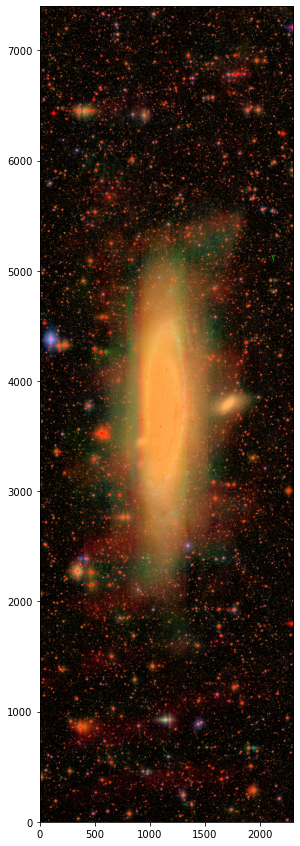

In [5]:
plt.figure(figsize=(15,15))
plt.imshow(rgb_default, origin='lower')
plt.show()

La imagen puede ser mejorada al modificar algunos de los parámetros de la función `make_lupton_rgb( )` como por ejemplo: el `minimum`, el `stretch` y el factor `Q`.

Al modificar el `minimum` se cambia el nivel de negro de la imagen, mientraas que el `stretch` y el factor `Q` cambian la forma como se escalan los niveles de negro y blanco.

Valores por defecto: \
minimum = 0.\
stretch= 5.  (relación de linealidad en la imagen)\
Q = 8 (Parametro de suavizado asinh)

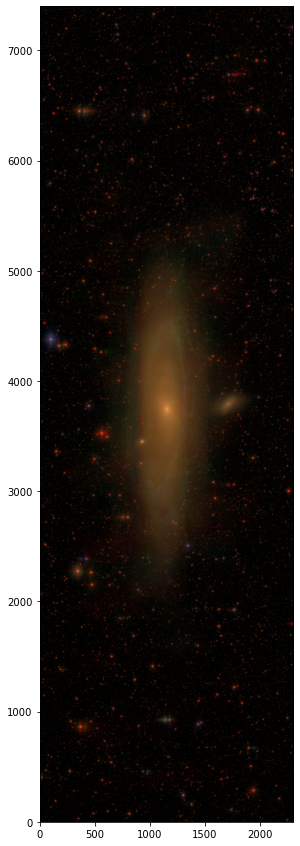

In [6]:
rgb_default = make_lupton_rgb(i, r, g,  stretch=40, Q=20)

plt.figure(figsize=(15,15))
plt.imshow(rgb_default, origin='lower')
plt.show()

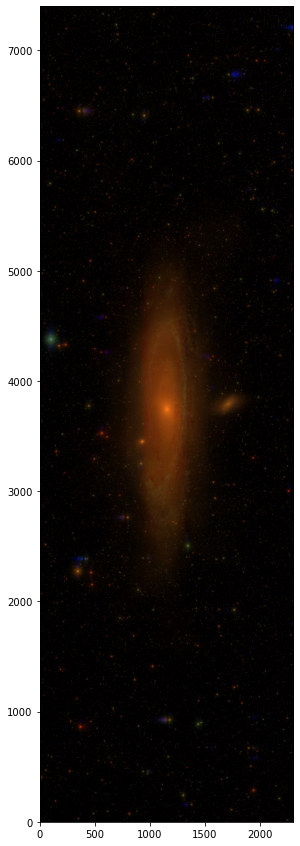

In [7]:
rgb_2 = make_lupton_rgb(r, g, u, stretch=50, Q=20)

plt.figure(figsize=(15,15))
plt.imshow(rgb_2, origin='lower')
plt.show()

Para comprender lo que hace esta función de composición, nótese que el objeto creado es un arreglo en el que cada componente es una matríz con los valores RGB del punto que se representará. 

In [ ]:
rgb_default

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  3],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 6,  0,  4],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 6,  2,  0]],

       [[ 0,  0,  0],
        [ 6,  2,  0],
        [ 0,  2,  0],
        ...,
        [ 0,  0,  0],
        [ 3,  0,  2],
        [ 1,  6,  2]],

       ...,

       [[30, 23,  6],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 5,  1,  1],
        [ 1,  0,  2],
        [ 2,  8,  0]],

       [[ 0,  1,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 9,  3,  0],
        [14,  3,  0],
        [ 0,  0,  1]],

       [[21, 15,  6],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [90, 67, 29],
        [19, 10,  4],
        [ 5,  1,  0]]], dtype=uint8)